### Dataset
- Nesse trabalho vou explorar uma base vista em projetos passados, diabetes dataset.
- Nela encontramos informações sobre algumas características de pacientes. Queremos estudar as características das pacientes e encontrar possíveis relações

### Objetivo Geral
- Gerar modelos de classificação capazes de classificar pacientes com / sem diabetes da base diabetes dataset

### Objetivos Específicos
- Estudar um novo conceito: Confusion Matrix
- Estudar outras métricas para os modelos de classificação (Recall, Precisão, F1score)
- Avaliar um novo modelo de classificação e uma nova métrica: Regressão Logística e Curva ROC
- Avaliar formas de seleção dos parâmetros de diversos modelos (Hyperparameter tuning)

### Fonte
- Projeto pessoal com os assuntos abordados no módulo: <br>
    'Supervised Learning with scikit-learn - Fine-tuning your model', da plataforma DataCamp, trilha 'Machine Learning Scientist with Python'

# Importando Bibliotecas

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from scipy.stats import randint

# Modelo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Métrias
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error 

# Compreensão Base
### Visualização Inicial

In [134]:
# Importando base de Dados
diabetes_df = pd.read_csv('datacamp_workspace_export_2022-03-28 11_17_51.csv')
diabetes_df = diabetes_df.drop('index', axis = 1)
display(diabetes_df)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


- Não vamos precisar nos preocupar com tratamento de texto
- Base possui apenas dados numéricos

In [157]:
# Verificação Colunas
print('\n'.join(list(diabetes_df.columns)))

pregnancies
glucose
diastolic
triceps
insulin
bmi
dpf
age
diabetes


### Descrição Colunas

- Pregnancies: Número de gavidez
- Glucose: Glicose no Sangue 
- Diastolic: Pressão Sanguínea (mmHg)
- Triceps: Expessura Pele 
- Insulin: Insulina 
- BMI: Índice de Massa Corporal  
- DiabetesPedigreeFunction: Probabilidade de desenvolver diabetes baseado no histórico familiar  
- Age: Idade
- Outcome: Saída de classificação para diabetes (1 --> positivo para diabetes, 0 --> negativo para diabetes)

### Análise Inicial

In [158]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [159]:
diabetes_df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [161]:
diabetes_df.skew().sort_values(ascending = False)

insulin        2.272251
dpf            1.919911
age            1.129597
pregnancies    0.901674
diabetes       0.635017
glucose        0.173754
triceps        0.109372
bmi           -0.428982
diastolic     -1.843608
dtype: float64

- Um ponto muito positivo é que todos os valores estão preenchidos, não teremos problemas com tratamento de valorres vazios
- Todos os valores estão sendo lidos como números
- A um primeiro momento não vejo nenhuma necessidade de tratamento de dados ou feature engineering
- Os próximos passos serão destinados a entender da melhor forma possível os dados obtidos
- Algumas das colunas estão fugindo um pouco da distribuição normal, como por exemplo a coluna de insulina

# Exploratory Data Analysis (EDA)
### Análise Geral

<AxesSubplot:>

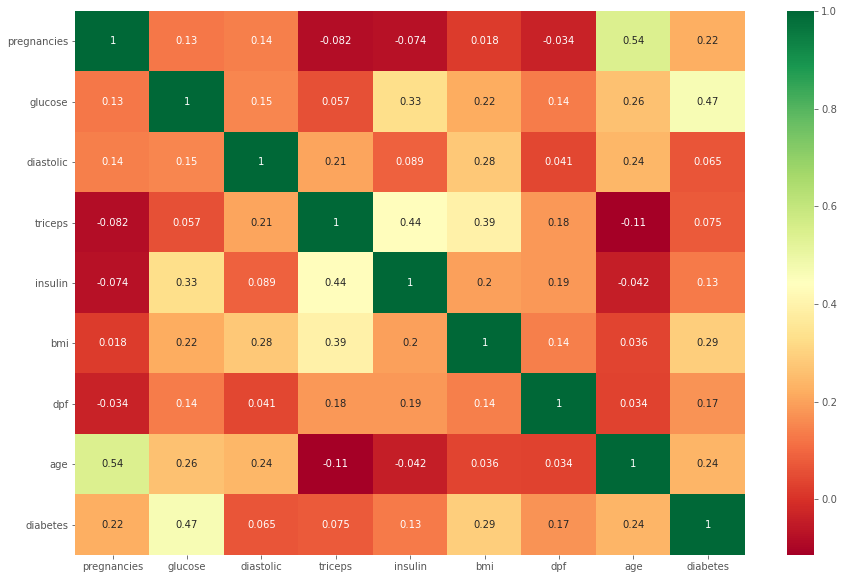

In [164]:
plt.figure(figsize=(15,10))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='RdYlGn')

- Relações interessantes sobre a relação das colunas:<br>
    1. Idade e número de gravidez são as colunas com maior correlação, naturalmente quanto maior a idade da pessoa maior a chance delas ter tido mais filhos<br>
    2. O nível de Glicose é a coluna com maior correlação com a nossa coluna de interesse 'Outcome'<br>
    3. Esperava uma maior relação da coluna de pressão sanguínea com outras colunas, como idade e BMI<br>
    4. A medida referente a expessura da pele está mais relacionada com valores de insulina e BMI<br>
    5. Esperava uma relação maior entre as colunas DiabetesPedigreeFunction e a coluna 'Outcome'<br>

### Análise Colunas

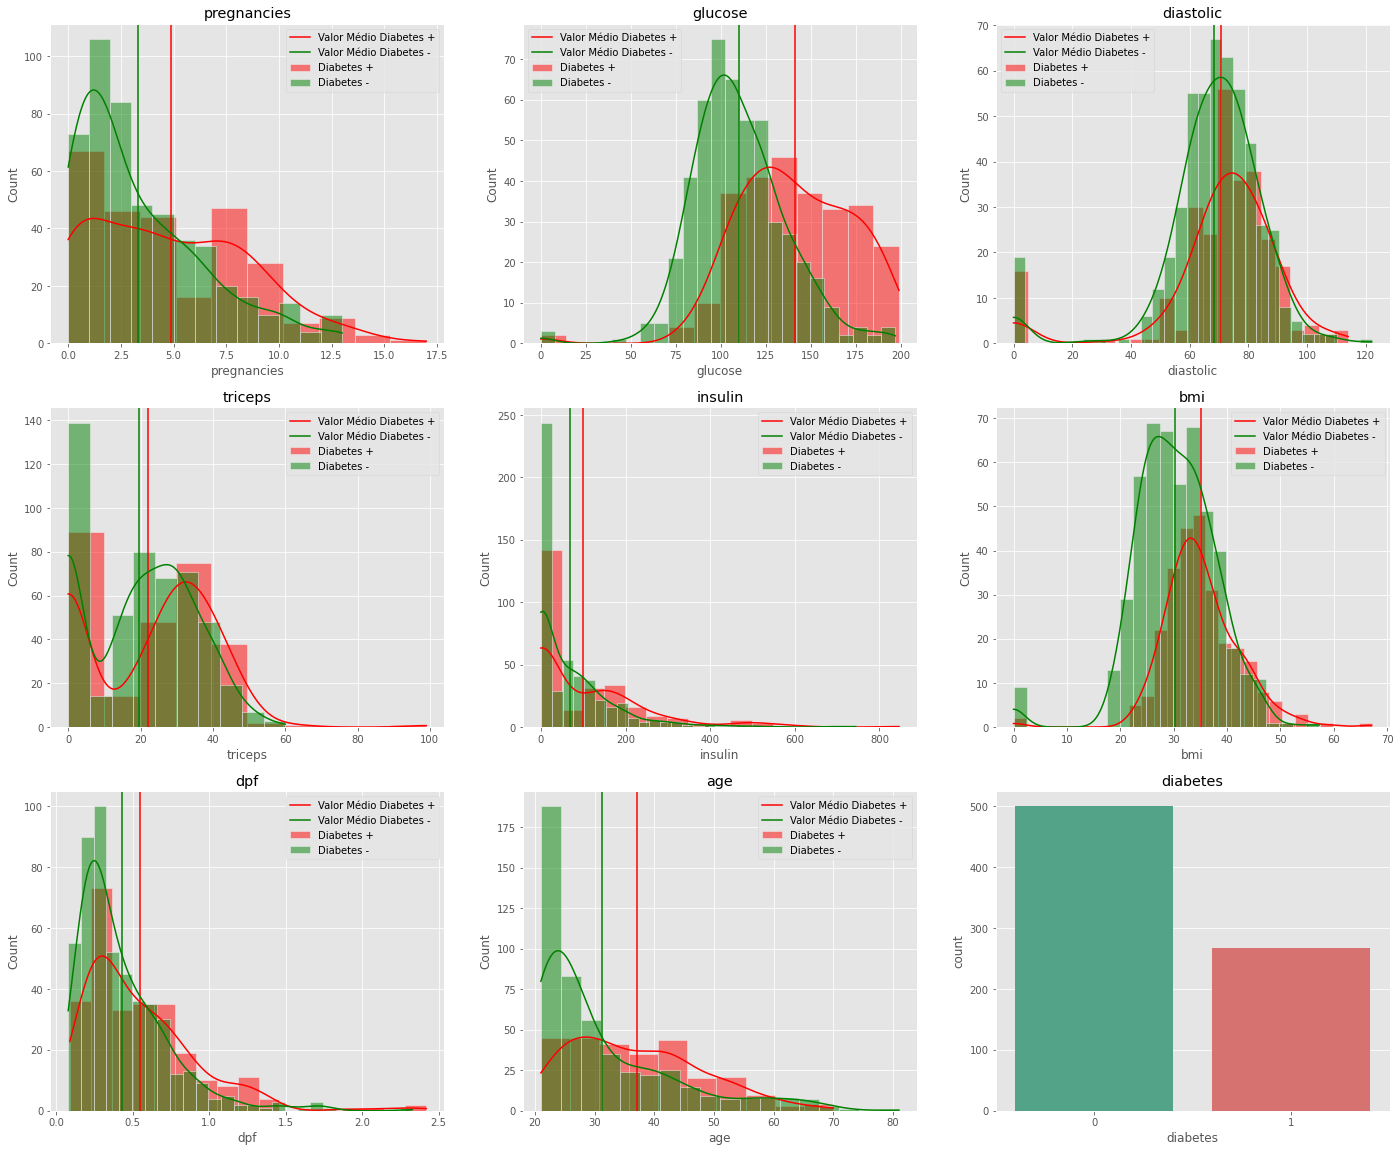

In [166]:
# Histogramas
df = diabetes_df.copy()

colunas_lt = list(df.columns)

diabetes_pos_df = df[df['diabetes'] == 1]
diabetes_neg_df = df[df['diabetes'] == 0]

plt.figure(figsize=(24,20))

# Histogramas
for i, coluna in enumerate(colunas_lt):
    if i == (len(colunas_lt)-1):
        plt.subplot(3,3,i+1)
        g = sns.countplot(x = coluna, data = df, palette = ['#45B08C','#E7625F'])
        g.set_title(coluna)

    else:
        plt.subplot(3,3,i+1)
        # Diabetes +
        g = sns.histplot(diabetes_pos_df[coluna], kde = True, color = 'r', label ='Diabetes +')
        mean1 = diabetes_pos_df[coluna].mean()
        plt.axvline(mean1, color = 'r', label = 'Valor Médio Diabetes +')
        # Diabetes -
        g = sns.histplot(diabetes_neg_df[coluna], kde = True, color = 'g', label ='Diabetes -')
        mean2 = diabetes_neg_df[coluna].mean()
        plt.axvline(mean2, color = 'g', label = 'Valor Médio Diabetes -')
        
        g.set_title(coluna)
        plt.legend()

plt.show()

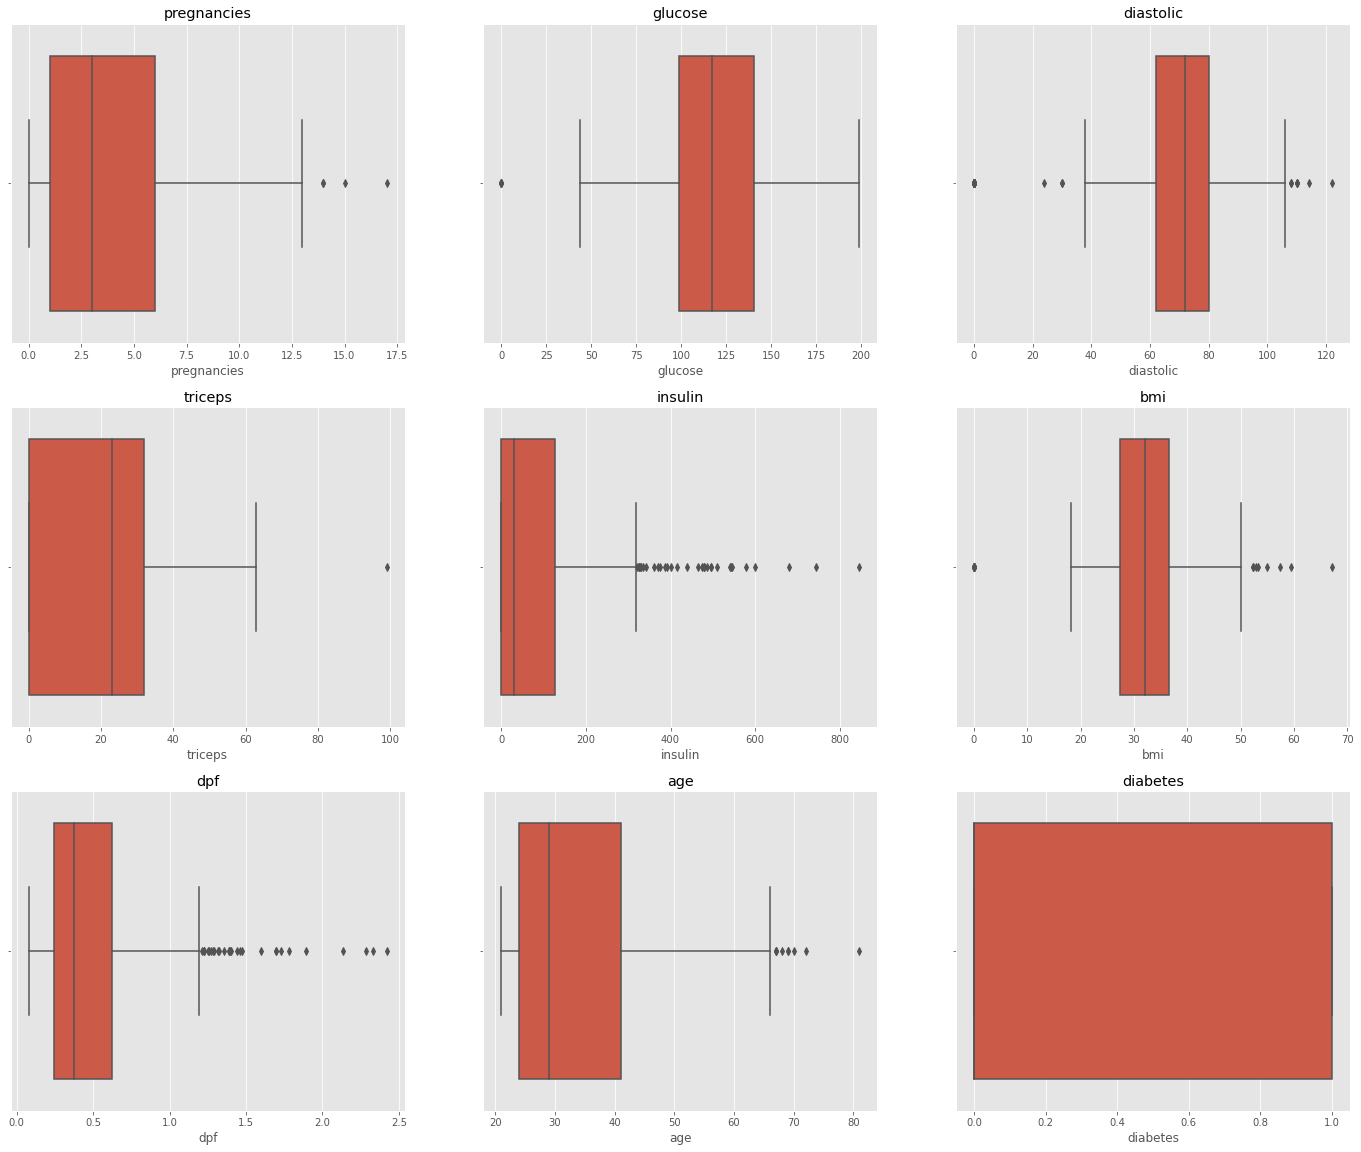

In [167]:
# Boxplots (perfil geral das colunas)
plt.figure(figsize=(24,20))

for i, coluna in enumerate(colunas_lt):
    plt.subplot(3,3,i+1)
    g = sns.boxplot(x = df[coluna])    
    g.set_title(coluna)

plt.show()

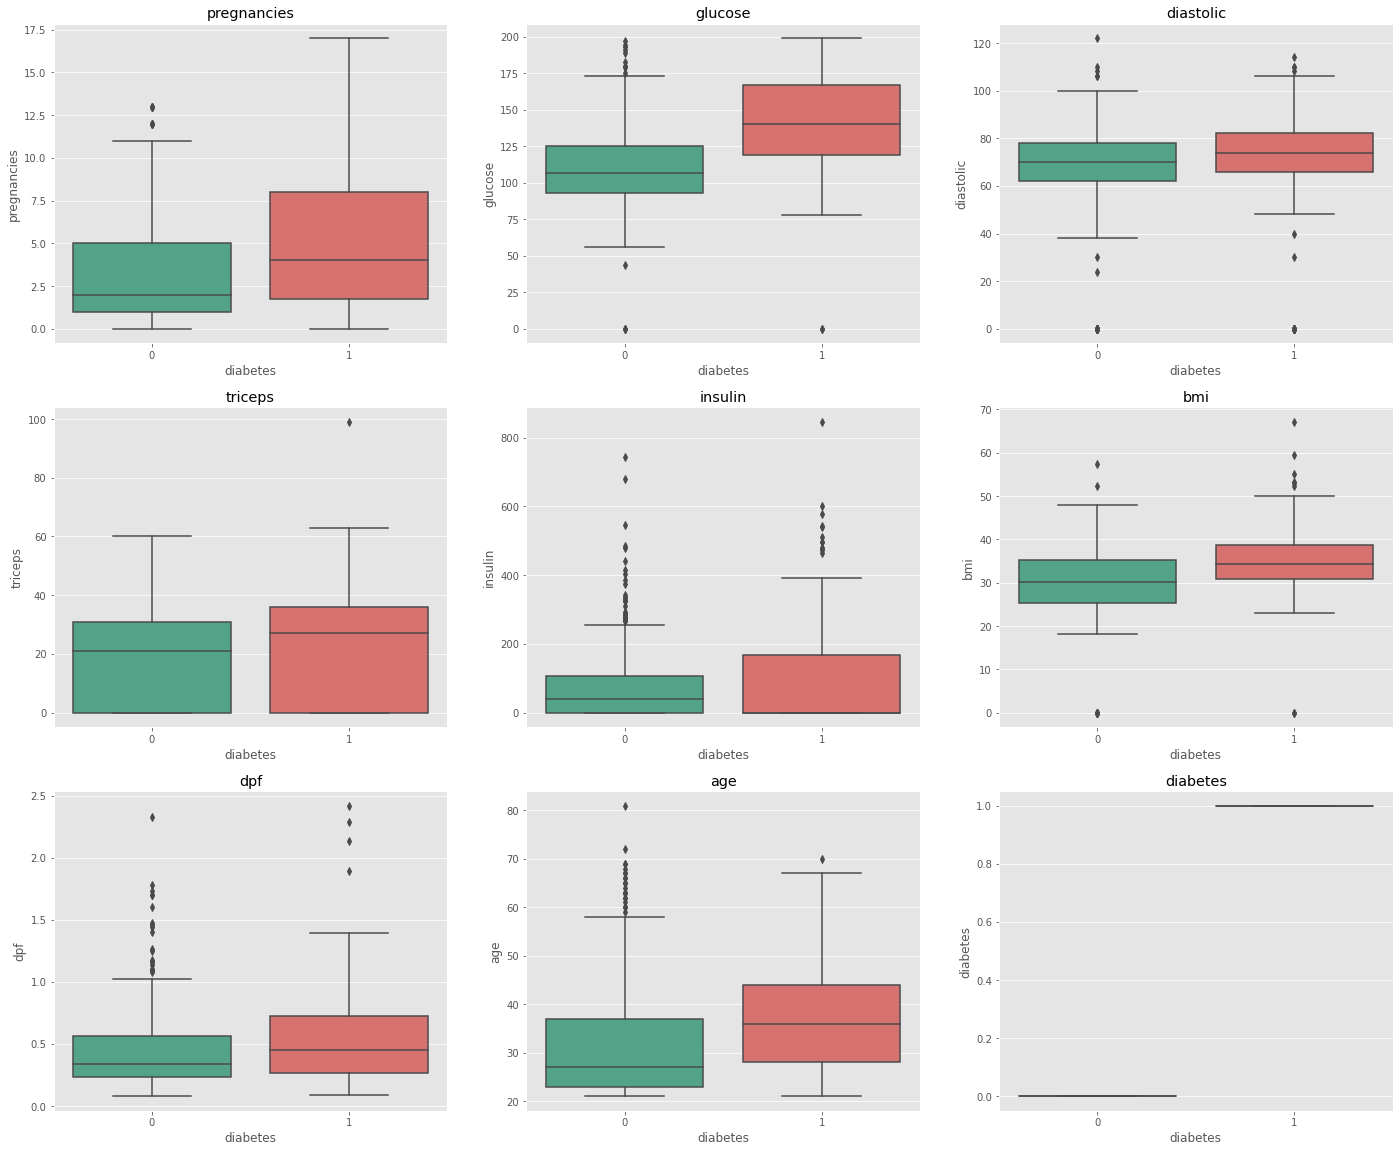

In [168]:
# Boxplots (perfil dividido entre pacientes com e sem diabetes)
plt.figure(figsize=(24,20))

for i, coluna in enumerate(colunas_lt):
    plt.subplot(3,3,i+1)
    g = sns.boxplot(x = df['diabetes'], y = df[coluna], palette = ['#45B08C','#E7625F'] )    
    g.set_title(coluna)

plt.show()

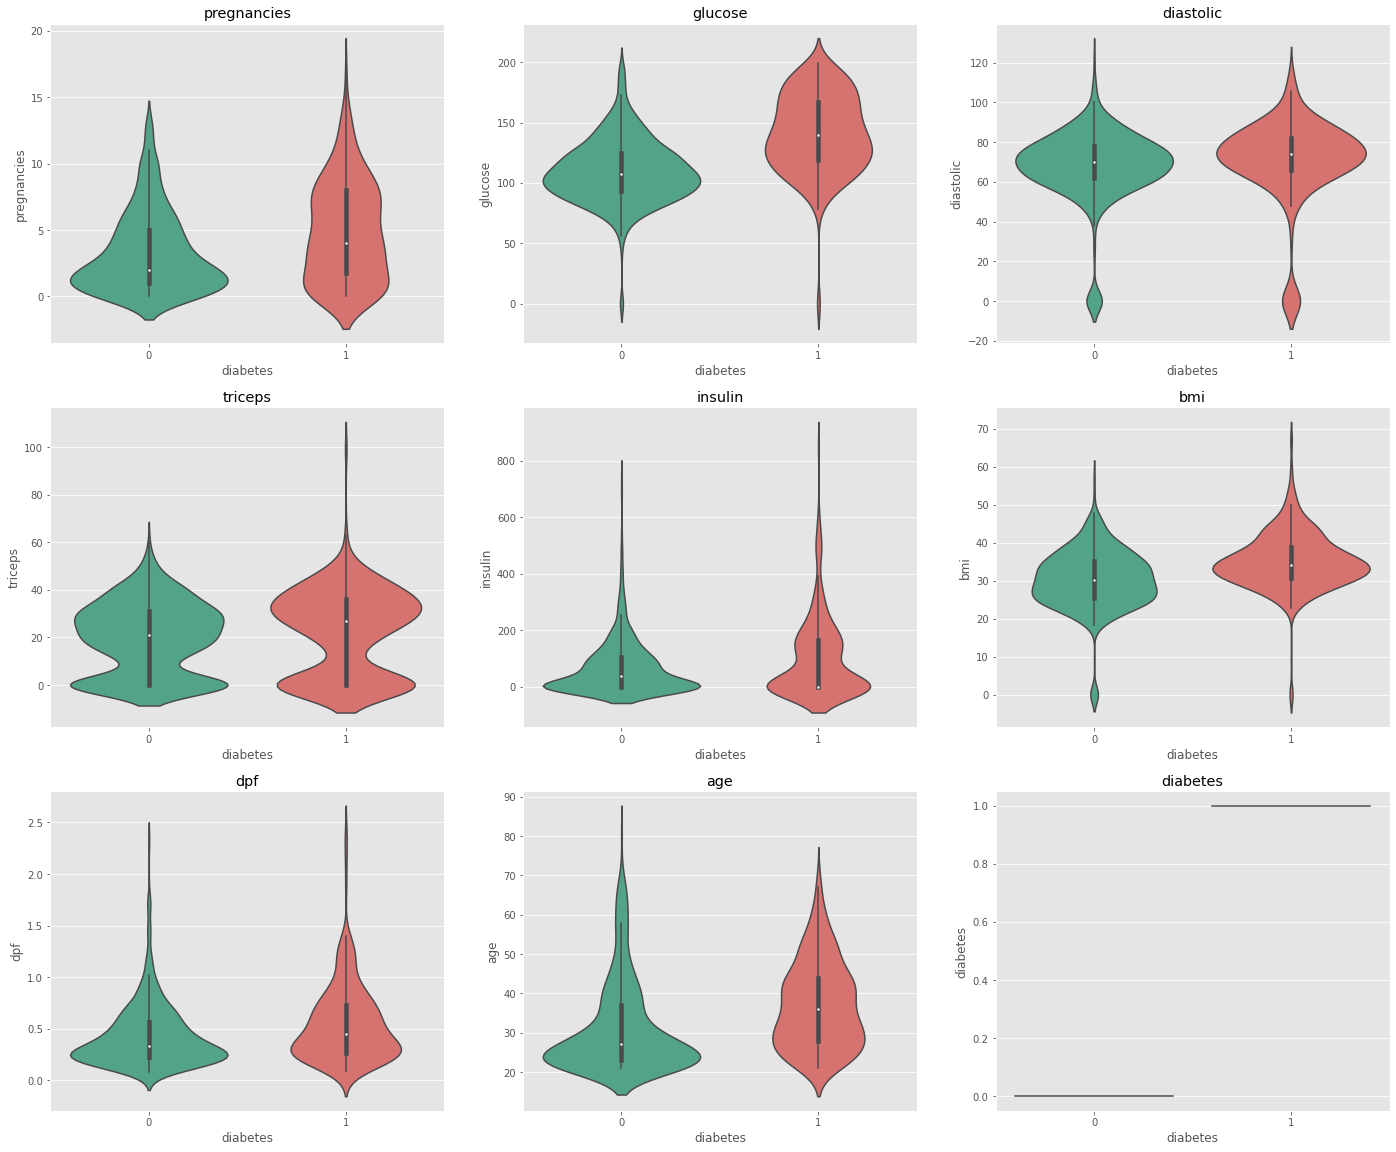

In [169]:
# Gráficos 'violin'
plt.figure(figsize=(24,20))

for i, coluna in enumerate(colunas_lt):
    plt.subplot(3,3,i+1)
    g = sns.violinplot(x = df['diabetes'], y = df[coluna], palette = ['#45B08C','#E7625F'] )    
    g.set_title(coluna)

plt.show()

# Modelos de Previsão

- Nessa etapa vamos trabalhar com 3 modelos de classificação
    1. KNeighborsClassifier
    2. Regressão Logística
    3. Decision Tree

- O objetivo desse etapa é estudar, além dos modelos outros tópicos importantes:
    1. Confusion Matrix
    2. Outras Métricas de Avaliação
    3. Hyperparameter tuning

In [170]:
# Separando variável dependende das independentes 
X = diabetes_df.drop('diabetes', axis = 1)
y = diabetes_df['diabetes']

# KNeighborsClassifier
- Vamos treinar o modelo K-means (visto em projetos anteriores)

In [136]:
# Gerando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Criando modelo k-NN classifier
knn = KNeighborsClassifier(n_neighbors = 6)

# Treinando modelo
knn.fit(X_train, y_train)

# Previsão
y_pred = knn.predict(X_test)

### Métricas
- Anteriormente nós usamos a acurácia como métrica para avaliar nosso modelo de classificação. Porém nem sempre ela será uma boa opção. Para casos em que temos dados desbalanceados, como por exemplo um caso em que a frequeência de uma classe é muito menor que outra, a acurácia certamente não é um bom avaliador.
- Exemplo: queremos classificar casos de diabetes, naturalmente a maior parte das pessoas na base não tem diabetes (considerando uma população de pessoas saudáveis em geral). Assim poderíamos criar um modelo que diz que todas são saudáveis e ainda sim obter uma acurácia muito alta, mesmo que o modelo não cumpra com seu propósito: Identificar casos de diabetes
- Dessa forma, para esse tipo de situação, precisamos de outras formas de avaliar nossos modelos!
- Nessa etapa vamos avaliar outras métricas de análise:
    1. Precisão
    2. Recall
    3. F1score

### Confusion Matrix
- Vamos trabalhar agora com um novo conceito: Confusion Matrix
- Imagine um caso em que queremos classificar se um email é ou não Spam, sabemos que a maioria dos emails não são Spam. Assim temos claramente um caso de classificação com classes altamente desbalanceadas!

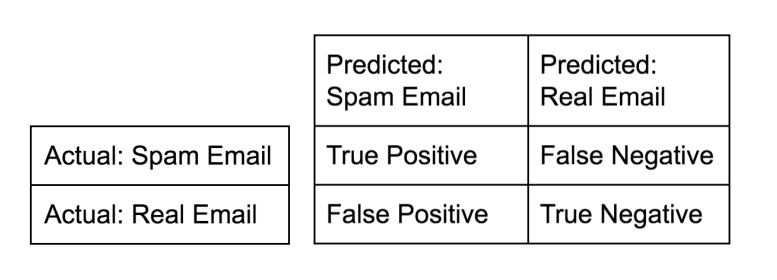

- A ideia é separarmos as previsões em 4 grupos:
    1. Positivo Verdadeiro (Email previsto como Spam e realmente era Spam)
    2. Positivo Falso (Email previsto como Spam mas não era Spam)
    3. Negativo Verdadeiro (Email previsto como não Spam e realmente não era Spam)
    4. Negativo Falso (Email previsto como não Spam mas era Spam)
    
    
- Normalmente a parcela positiva corresponde a parcela que nós temos interesse em estudar, na imagem emails spam e no nosso trabalho casos de diabetes positivo

In [137]:
# Gerando confusion matrix
print(confusion_matrix(y_test, y_pred))

[[176  30]
 [ 56  46]]


- Resultados do nosso modelo de previsão de diabétes 
    1. Positivo Verdadeiro: 176
    2. Positivo Falso: 56
    3. Negativo Falso: 30
    4. Negativo Verdadeiro: 46

- Agora com esses 4 valores, podemos obter outras métricas:
    1. Precisão 
    2. Recall
    3. F1score

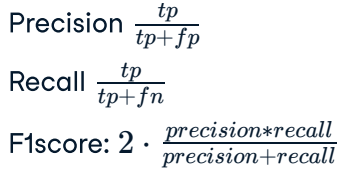

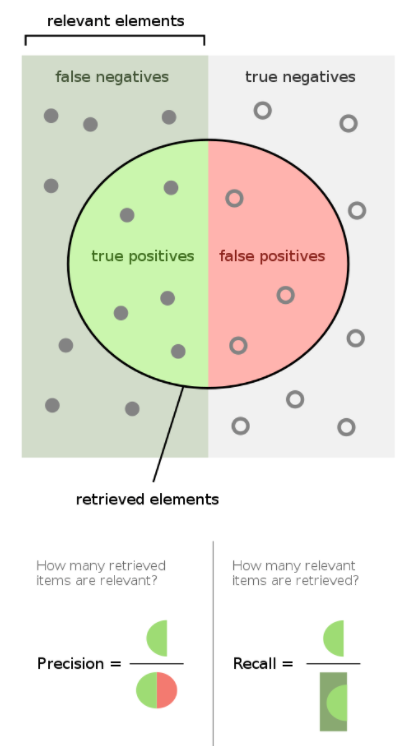

- Observe: F1score é 2 vezes a média harmônica da precisão e do recall
- Vamos calcular de maneira manual esses parâmetros!

In [138]:
# Gerando confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Definindo os valores da confusion matrix
tp = conf_matrix[0][0]
fn = conf_matrix[0][1]
fp = conf_matrix[1][0]
tn = conf_matrix[1][1]

# Cálculo métricas
precisao = tp / (tp + fp)
recall = tp / (tp + fn)
f1score = 2 * precisao * recall / (precisao + recall)
acuracia = (tp + tn) / (tp + tn +fp + fn)

print(f'Precisão: {precisao}')
print(f'Recall: {recall}')
print(f'F1Score: {f1score}')
print(f'Acurácia: {acuracia}')

Precisão: 0.7586206896551724
Recall: 0.8543689320388349
F1Score: 0.8036529680365296
Acurácia: 0.7207792207792207


- Vamos observar agora se nossos valores batem com os valores obtidos através do comando 'classification_report'
- Esse comando faz os cálculos de maneira automática

In [139]:
# Gerando classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



- Felizmente os valores bateram! Aparentemente os cálculos foram feitos de maneira correta

# Precisão x Recall

- Precisão: Métrica leva em conta o todo (pessoas com 'tp' e sem diabetes 'fp')
- Recall: Métricas tem um foco muito maior na parcela de interesse (pessoas com diabetes 'tp' e 'fn')

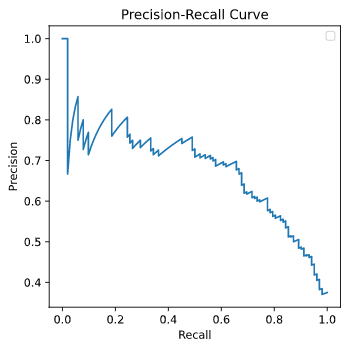

- Observe a imagem anterior, o nome desse tipo de gráfico é 'Precision-Recall Curve'
- Vamos tentar entender um pouco mais a fundo a relação entre precisão e recall
- Veja que quando o parâmetro 'threshold' é muito próximo de 1, nossa precisão fica também muito próxima de 1! Isso ocorre pois nosso modelo ficou mais 'criterioso'. É como se o modelo só afirmasse positivo quando ele tivesse certeza, em contrapartida teremos um grande númeor de falsos negativos!
- Por outro lado quando temos o parâmetro 'threshold' próximo de 0, o recall fica muito próximo de 1! Observe, se nosso modelo é pouco rigoroso, ele vai classificar várias amostras como positivas. Assim o valor de Positivos Verdadeiros será muito alto, porém nessa situação o modelo é muito rigoroso do ponto de vista de dar falsos negativos, não havendo quase nenhum assim o parâmetro 'False Negative' é quase 0, levando o valor de recall para 1

# Regressão Logística e Curva ROC 

- Nessa etapa vamos avaliar um novo modelo:
    Regressão Logística

### Regressão Logística
- Apesar do modelo se chamar regressão logística, ele é um modelo de classificação
- Estabelece um parâmetro p
- Se o 'p' previsto é maior que 0,5 considera verdadeiro (1) se p é menor que 0.5 considera falso (0)
- Por default, o modelo estabelece esse limiar de 0,5 (threshold)

In [140]:
# Gerando o modelo
logreg = LogisticRegression(max_iter = 500)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Treino
logreg.fit(X_train, y_train)

# Previsão
y_pred = logreg.predict(X_test)

In [141]:
# Gerando confusion matrix
print(confusion_matrix(y_test, y_pred))

[[168  38]
 [ 36  66]]


In [142]:
# Gerando classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



### Curva ROC - Receiver Operationg Characteristic Curve

- Curva obtida a partir da variação do limiar (threshold)
- Para threshold igual a 0, todas as previsões são positivas (1)
- Para threshold igual a 1, todas as previsões são negativas (0). Quando aumentamos o threshold (corte/limiar) garantimos mais leituras positivas corretas pois o 'critério' ficou mais rigosoro

In [143]:
# % de chance de acerto
y_pred_prob = logreg.predict_proba(X_test)[:,1]
# False Positive Ratio , True Positive Ratio, Thresholds
# Detalhe: True Positive Ratio = Recall
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

- Vale ressaltar que a maioria dos modelos possui o comando predict_proba
- Ele avalia a probabilidade de uma dada amostrar estar em uma classe retornando um valor contínuo
- Veja a saída de maneira mais detalhada

In [144]:
logreg.predict_proba(X_test)

array([[0.69419082, 0.30580918],
       [0.80286903, 0.19713097],
       [0.85942992, 0.14057008],
       [0.83573908, 0.16426092],
       [0.48554652, 0.51445348],
       [0.5039675 , 0.4960325 ],
       [0.98326333, 0.01673667],
       [0.39644244, 0.60355756],
       [0.45346153, 0.54653847],
       [0.20605451, 0.79394549],
       [0.74524079, 0.25475921],
       [0.11437879, 0.88562121],
       [0.58195479, 0.41804521],
       [0.70427338, 0.29572662],
       [0.92730391, 0.07269609],
       [0.65883049, 0.34116951],
       [0.85193785, 0.14806215],
       [0.917374  , 0.082626  ],
       [0.15561825, 0.84438175],
       [0.40204049, 0.59795951],
       [0.75683404, 0.24316596],
       [0.91366761, 0.08633239],
       [0.49291065, 0.50708935],
       [0.89213588, 0.10786412],
       [0.41955215, 0.58044785],
       [0.1337244 , 0.8662756 ],
       [0.88163617, 0.11836383],
       [0.96581413, 0.03418587],
       [0.68126726, 0.31873274],
       [0.86989773, 0.13010227],
       [0.

- Observe que temos um array de 2 dimensões
- O primeiro valor se refere a probabilidade da amostra ter classificação '0'
- O segundo valor se refere a probabilidade da amostra ter classificação '1'

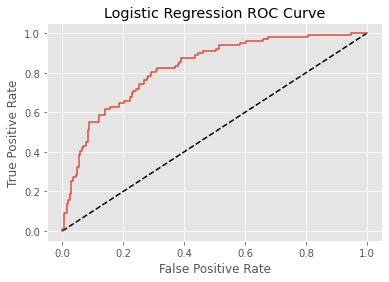

In [145]:
# Plot
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

- Para um modelo que faz previsões aleatórias, teríamos 50% de acerto (representado pela linha pontilhada preta)
- Assim vemos que nosso modelo ficou superior a um modelo de previsão aleatória
- Mas como sabemos avaliar isso? Se o modelo ficou melhor ou pior, onde vejo isso no gráfico?
- Veremos isso a seguir

### Area Under the ROC Curve - AUC
- Quanto maior for a área abaixo da curva ROC melhor é o modelo

In [146]:
auc = roc_auc_score(y_test, y_pred_prob)
print(f'O valor de área abaixo da curva ROC foi de {auc}')

O valor de área abaixo da curva ROC foi de 0.8242908814011042


In [147]:
# Cross-validation
# Observação: o método cross-validation usa R² como defaul
# Precisamos ajustar para ele ler o método correspondente ao roc_auc_score 
cv_scores = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')
print(f'Valores de área abaixo da curva ROC usando 5-fold cross-validation:\n {cv_scores}')

Valores de área abaixo da curva ROC usando 5-fold cross-validation:
 [0.81240741 0.80777778 0.82555556 0.87283019 0.84471698]


- Um ponto positivo é que os valores de área ficaram bem próximos, não houve uma variação muito grande!

# Hyperparameter tuning
- Outro tópico que quero discutir nesse Projeto é sobre avaliar os melhores parâmetros para os modelos que treinamos
- Nos trabalhos anteriores vimos modelos em que devíamos escolher determinados parãmetros:
    1. Regressão Linear
    2. Ridge/Lasso: Escolher alfa
    3. k-Nearest Neighbors: Escolher n_neighbors
- Parâmetros que precisam ser especificados antes de treinar o modelo são chamados 'Hyperparameters'
- Para avaliarmos o melhor alfa ou o melhor k precisamos testar vários valores e ver qual deles nos gera um melhor modelo
- Para isso usamos o método 'GridSearchCV', ele nos auxilia a achar os melhores valores para nossos Hyperparâmetros
- Aplicar o método de cross validation é essencial! Precisamos de valores de métricas confiáveis para estipular a melhor combinação de hiperparâmetros

### K neighbors Classifier

In [149]:
param_grid = {'n_neighbors': np.arange(1, 50)} 
# Caso existam 2 Hyperparametros, o segundo deve ser passado aqui como segunda chave do dicionário

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
knn_cv.best_params_

{'n_neighbors': 14}

- Vemos que o valor ótimo do Hiperparâmetro 'n_neighbors' é 14

In [150]:
knn_cv.best_score_

0.7578558696205755

### Logistic Regression
- Assim como o modelo K-NN, a regressão Logística também possui um hiperparametro 'C', possui função de regularizar o modelo
- Da mesma forma como o parâmetro alfa nos modelos de regressão Lasso e Ridge possui uma função reguladora, o parâmetro C na regressão Logística também!
- Valores altos de C podem levar a overfit, enquanto pequenos valores podem levar a underfit

In [ ]:
# Definindo intervalo do parâmetro C
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Defindo o classificador
logreg = LogisticRegression(max_iter = 500)

# GridSearchCV
logreg_cv = GridSearchCV(logreg, param_grid, cv= 5)

# Treinando o modelo para todos os valores de 'C'
logreg_cv.fit(X,y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

# Hyperparameter tuning with RandomizedSearchCV
- Testar literalmente todos os valores de hiperparametros com o GridSearchCV pode ser caro
- Solução: Usar o RandomizedSearchCV (não chega a testar todos os valores)
- Para esse exemplo vamos usar o modelo Decision Tree Classifier
- Vamos usá-lo pois ele possui uma série de hiperparâmetros que podemos variar para melhorar o modelo, como:
    1. max_features
    2. max_depth
    3. min_samples_leaf
    4. criterion

In [151]:
# Parâmetros
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Modelo
tree = DecisionTreeClassifier()

# RandomizedSearchCV
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

# Treino
tree_cv.fit(X, y)

# Melhores Parâmetros
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
# Melhor Cross-validation
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 5}
Best score is 0.7500551735845853


# Hold-out set
- Semelhante a trabalhar com a divisão de dados de treino e dados de teste, usado quando vamos avaliar melhores condições de Hiperparâmetros

### Logistic Regression
- Além do hiperparâmetro C, a regressão logística ainda possui um outro regularizador chamado 'penalty'
- 'penalty' pode assumir dois valores, 'l1' e 'l2'

In [152]:
# Criando hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Gerando Modelo logistic regression classifier: logreg
logreg = LogisticRegression(max_iter = 1000)

# Criando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Inicializando GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

# Treinando modelo
logreg_cv.fit(X_train, y_train)

# Avaliando melhor distribuição de Hyperparamns e melhor acurácia
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_valida

Tuned Logistic Regression Parameter: {'C': 0.0007196856730011522, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7630434782608695


- O modelo conseguiu chegar em um valor ótimo de C apesar da grande quantidade de tentativas com falha

# Conclusão
- O modelo de classificação, KNeighbors, alcançou bons valores de precisão, recall, F1score e acurácia mesmo sem nenhum pré tratamento ou otimização de parâmetros
- Os resultados (precisão, recall, F1score e acurácia) obtidos utilizando a regressão logística foram levemente superiores aos obtidos com o modelo KNeighbors
- Avaliando o parâmetro AUC, foram obtidos valores consistentes após o processo de cross validation utilizando 5-fold (os 5 valores foram próximos, não houve muita variação)
- Após o processo de otimização de hiperparâmetros foi notada uma melhora nos valores de acurácia
- O processo de otimização do hiperparâmetro 'penalty' da regressão logística apresentou bastante erro durante as tentativas e no fim foi obtido um valor extremamente baixo do parãmetro 'C' podendo favorecer underfit do modelo